# Standardization

Here are some examples of how to standardize molecules.

First set our iPython notebook to display molecule images and log messages:

In [1]:
from rdkit.Chem.Draw import IPythonConsole
import logging
logger = logging.getLogger('molvs')
logger.setLevel(logging.INFO)

/Users/matt/.virtualenvs/molvs/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Standardizing a SMILES string

The `standardize_smiles` function provides a quick and easy way to get the standardized version of a given SMILES string:

In [2]:
from molvs import standardize_smiles
standardize_smiles('C[n+]1c([N-](C))cccc1')

INFO:molvs.normalize:Rule applied: Recombine 1,3-separated charges


'CN=c1ccccn1C'

While this is convenient for one-off cases, it's inefficient when dealing with multiple molecules and doesn't allow any customization of the standardization process.

## The Standardizer class

The `Standardizer` class provides flexibility to specify custom standardization stages and efficiently standardize multiple molecules.

In [3]:
from rdkit import Chem
import molvs
from molvs import Standardizer

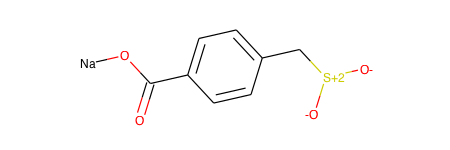

In [4]:
mol = Chem.MolFromSmiles('[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1')
mol

INFO:molvs.metal:Removed covalent bond between Na and O
INFO:molvs.normalize:Rule applied: Sulfone to S(=O)(=O)


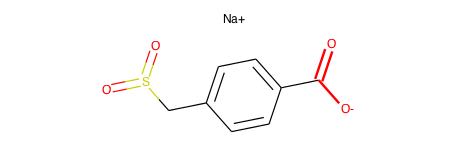

In [5]:
s = Standardizer()
smol = s.standardize(mol)
smol

In [6]:
Chem.MolToSmiles(smol)

'O=C([O-])c1ccc(C[S](=O)=O)cc1.[Na+]'

The `Standardizer` class takes a number of initialization parameters to customize its behaviour:

INFO:molvs.metal:Removed covalent bond between Na and O


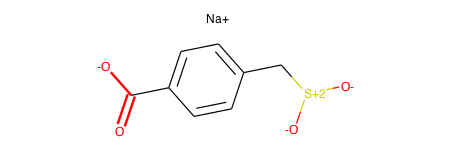

In [7]:
from molvs.normalize import Normalization
norms = (
    Normalization('Nitro to N+(O-)=O', '[*:1][N,P,As,Sb:2](=[O,S,Se,Te:3])=[O,S,Se,Te:4]>>[*:1][*+1:2]([*-1:3])=[*:4]'),
    Normalization('Pyridine oxide to n+O-', '[n:1]=[O:2]>>[n+:1][O-:2]'),
)

my_s = Standardizer(normalizations=norms)
smol = my_s.standardize(mol)
smol

Notice that the sulfone group wasn't normalized in this case, because when initializing the Standardizer we only specified two Normalizations.

The default list of normalizations is `molvs.normalize.NORMALIZATIONS`.

It is possible to resuse a Standardizer instance on many molecules once it has been initialized with some parameters:

INFO:molvs.charge:Moved proton from –SO3H to -CO2H


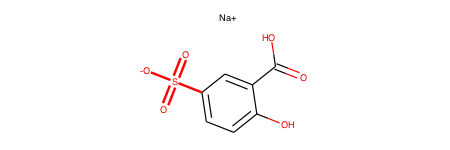

In [8]:
my_s.standardize(Chem.MolFromSmiles('C1=C(C=C(C(=C1)O)C(=O)[O-])[S](O)(=O)=O.[Na+]'))

INFO:molvs.metal:Removed covalent bond between Ag and O
INFO:molvs.metal:Removed covalent bond between Ag and O


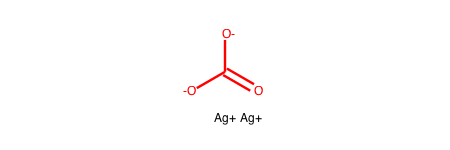

In [9]:
my_s.standardize(Chem.MolFromSmiles('[Ag]OC(=O)O[Ag]'))